# 📘 Scenario-Based Advanced Internship Assignment

## 🔁 Introduction
This assignment contains real-world analytics problems using `pandas`, `numpy`, `matplotlib`, and `seaborn`. You are expected to write code for each scenario and explain your findings.

---
## 🔷 Scenario 1: Product Performance Analysis

### Problem Statement
Identify top contributing product categories and find underperformers despite high pricing.

### 🧠 Instructions:
1. Compute total revenue by `Item_Type`
2. Sort and calculate cumulative revenue %
3. Identify high MRP but low sales products

### ✍️ Your Task:

In [ ]:
# TODO: Write code to analyze top contributors using Pareto principle
# and detect underperformers with high MRP but low sales

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
%matplotlib inline

# Load data
df = pd.read_csv('big_mart_sales - big_mart_sales.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [79]:
rev_by_type=df.groupby('Item_Type')['Item_Outlet_Sales'].sum().reset_index()  # calculate revenue
print(rev_by_type)

                Item_Type  Item_Outlet_Sales
0            Baking Goods       1.265525e+06
1                  Breads       5.532372e+05
2               Breakfast       2.322990e+05
3                  Canned       1.444151e+06
4                   Dairy       1.522594e+06
5            Frozen Foods       1.825735e+06
6   Fruits and Vegetables       2.820060e+06
7             Hard Drinks       4.577934e+05
8      Health and Hygiene       1.045200e+06
9               Household       2.055494e+06
10                   Meat       9.175656e+05
11                 Others       3.255176e+05
12                Seafood       1.488682e+05
13            Snack Foods       2.732786e+06
14            Soft Drinks       8.928977e+05
15          Starchy Foods       3.514013e+05


In [81]:
rev_by_type=rev_by_type.sort_values(by='Item_Outlet_Sales',ascending=False)   # sort by sales
rev_by_type['cum_revenue']=rev_by_type['Item_Outlet_Sales'].cumsum()    # cummulative revenue
rev_by_type['cum_percent']=100*rev_by_type['cum_revenue']/rev_by_type['Item_Outlet_Sales'].sum()      # cummulative revenue percentage
print(rev_by_type['cum_percent'])

6      15.168849
13     29.868261
9      40.924578
5      50.745042
4      58.934939
3      66.702901
0      73.510048
8      79.132086
10     84.067590
14     88.870407
1      91.846220
7      94.308650
15     96.198806
11     97.949736
2      99.199251
12    100.000000
Name: cum_percent, dtype: float64


In [83]:
# identify contributors
pareto_thresh=80     #setting pareto threshold 
top_contributor=rev_by_type[rev_by_type['cum_percent']<=pareto_thresh]    
print(top_contributor)

                Item_Type  Item_Outlet_Sales   cum_revenue  cum_percent
6   Fruits and Vegetables       2.820060e+06  2.820060e+06    15.168849
13            Snack Foods       2.732786e+06  5.552846e+06    29.868261
9               Household       2.055494e+06  7.608340e+06    40.924578
5            Frozen Foods       1.825735e+06  9.434074e+06    50.745042
4                   Dairy       1.522594e+06  1.095667e+07    58.934939
3                  Canned       1.444151e+06  1.240082e+07    66.702901
0            Baking Goods       1.265525e+06  1.366635e+07    73.510048
8      Health and Hygiene       1.045200e+06  1.471155e+07    79.132086


In [85]:
#identify underperformers
mrp_thresh=df['Item_MRP'].quantile(0.75)   #high mrp so use quantile for 75%
sales_thresh=df['Item_Outlet_Sales'].quantile(0.25)   # low sales use quantile for 25%
underperform=df[(df['Item_MRP']>mrp_thresh) & (df['Item_Outlet_Sales']<sales_thresh)]
summary=underperform.groupby('Item_Type').agg({
                'Item_MRP': 'mean',
                'Item_Outlet_Sales': 'mean',
                'Item_Identifier': 'count'}).reset_index().rename(columns={'Item_Identifier': 'Count'})

In [87]:
print(summary)


                Item_Type    Item_MRP  Item_Outlet_Sales  Count
0            Baking Goods  219.200682         462.026035     17
1                  Breads  221.456133         428.627244      9
2               Breakfast  219.003467         567.039667      3
3                  Canned  211.564053         469.699707     15
4                   Dairy  231.124794         524.070510     31
5            Frozen Foods  219.752736         464.621872     25
6   Fruits and Vegetables  219.063460         442.440745     40
7             Hard Drinks  201.255150         496.353900      4
8      Health and Hygiene  229.142883         492.858450     12
9               Household  222.969384         464.745921     38
10                   Meat  208.454614         524.935743     14
11                 Others  209.001720         502.812160      5
12                Seafood  186.558200         185.758200      1
13            Snack Foods  223.459400         487.936286     35
14            Soft Drinks  212.572247   

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Fruits and Vegetables'),
  Text(1, 0, 'Snack Foods'),
  Text(2, 0, 'Household'),
  Text(3, 0, 'Frozen Foods'),
  Text(4, 0, 'Dairy'),
  Text(5, 0, 'Canned'),
  Text(6, 0, 'Baking Goods'),
  Text(7, 0, 'Health and Hygiene'),
  Text(8, 0, 'Meat'),
  Text(9, 0, 'Soft Drinks'),
  Text(10, 0, 'Breads'),
  Text(11, 0, 'Hard Drinks'),
  Text(12, 0, 'Starchy Foods'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Breakfast'),
  Text(15, 0, 'Seafood')])

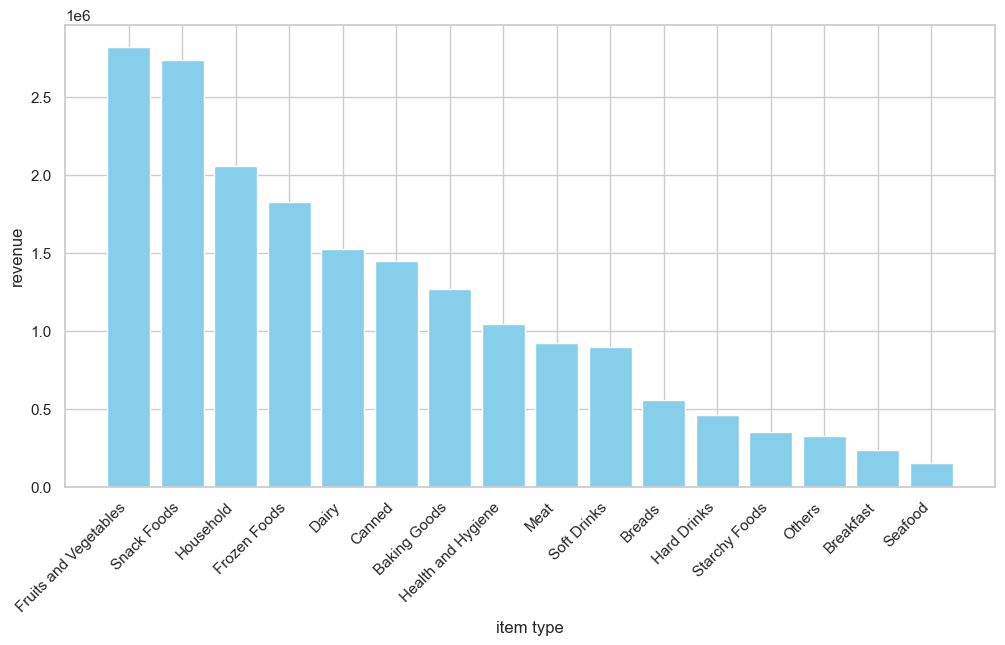

In [89]:
fig,ax1=plt.subplots(figsize=(12,6))
#bar plot for revenue
ax1.bar(rev_by_type['Item_Type'] , rev_by_type['Item_Outlet_Sales'],color='skyblue',label='revenue')
ax1.set_xlabel('item type')
ax1.set_ylabel('revenue')
plt.xticks(rotation=45,ha='right')

# 🔷 Scenario 2: Seasonal Outlet Insights

### Problem Statement
Simulate monthly performance of outlets and visualize trends.

### 🧠 Instructions:
1. Add random `Month` column
2. Group by `Outlet_Identifier` and `Month`
3. Plot monthly sales trend

### ✍️ Your Task:

In [ ]:
# TODO: Write code to simulate monthly sales trend per outlet

In [21]:
#random month column
np.random.seed(42)

In [91]:
df['month']=np.random.randint(1,13,size=len(df)) #add month column 

In [93]:
monthly_sales=df.groupby(['Outlet_Identifier', 'month'])['Item_Outlet_Sales'].sum().reset_index()
                            # groupby outlet identifier and month

In [29]:
print(monthly_sales.head(10))

  Outlet_Identifier  month  Item_Outlet_Sales
0            OUT010      1         16007.1636
1            OUT010      2         16284.8022
2            OUT010      3         18992.6108
3            OUT010      4         11190.7664
4            OUT010      5         16166.2898
5            OUT010      6         23241.7464
6            OUT010      7         11704.0982
7            OUT010      8         10307.2498
8            OUT010      9         18437.9994
9            OUT010     10         18693.0008


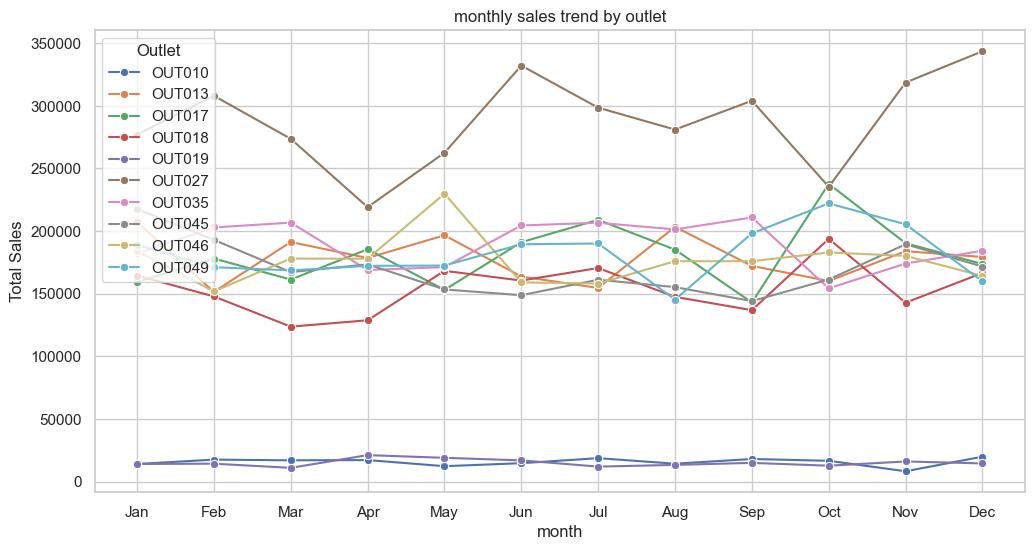

In [95]:
#line plot- monthly sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month', y='Item_Outlet_Sales', hue='Outlet_Identifier', marker='o')
plt.title('monthly sales trend by outlet')
plt.xlabel('month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Outlet')
plt.show()

---
## 🔷 Scenario 3: Price Band Segmentation

### Problem Statement
Segment items into price bands and analyze sales pattern.

### 🧠 Instructions:
1. Use `pd.cut()` or `pd.qcut()` to create bands
2. Analyze sales by band
3. Create a boxplot

### ✍️ Your Task:

In [ ]:
# TODO: Write code to segment price bands and compare sales across bands

In [97]:
#create bands
bins=[0,50,100,150,200,250]
labels=['0-50', '50-100', '100-150', '150-200', '200-300']
df['bands']=pd.cut(df['Item_MRP'],bins=bins,labels=labels,include_lowest=True)  #using bucket analysis created bands

In [99]:
#sales by band
sales_by_band=df.groupby('bands',observed=False)['Item_Outlet_Sales'].agg(['mean','sum','count']).reset_index()   #sales band

In [101]:
print(sales_by_band)

     bands         mean           sum  count
0     0-50   615.683818  4.660727e+05    757
1   50-100  1201.948711  2.021678e+06   1682
2  100-150  1891.408858  4.180014e+06   2210
3  150-200  2722.210833  6.625861e+06   2434
4  200-300  3600.741323  3.586338e+06    996


C:\Users\Samsung\AppData\Local\Temp\ipykernel_21844\445057520.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bands', y='Item_Outlet_Sales', data=df, palette='Blues')


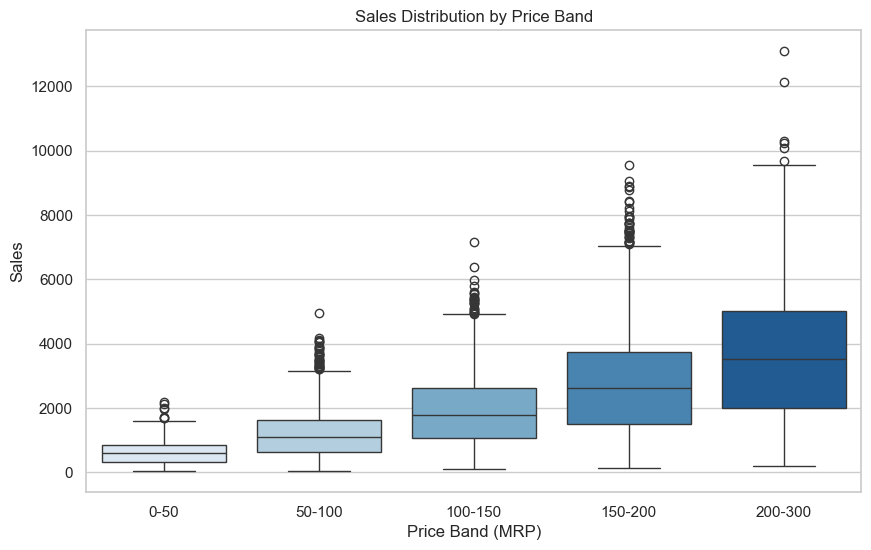

In [103]:
#box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='bands', y='Item_Outlet_Sales', data=df, palette='Blues')
plt.title('Sales Distribution by Price Band')
plt.xlabel('Price Band (MRP)')
plt.ylabel('Sales')
plt.show()

C:\Users\Samsung\AppData\Local\Temp\ipykernel_21844\1599727085.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bands', y='sum', data=sales_by_band, palette='Reds')


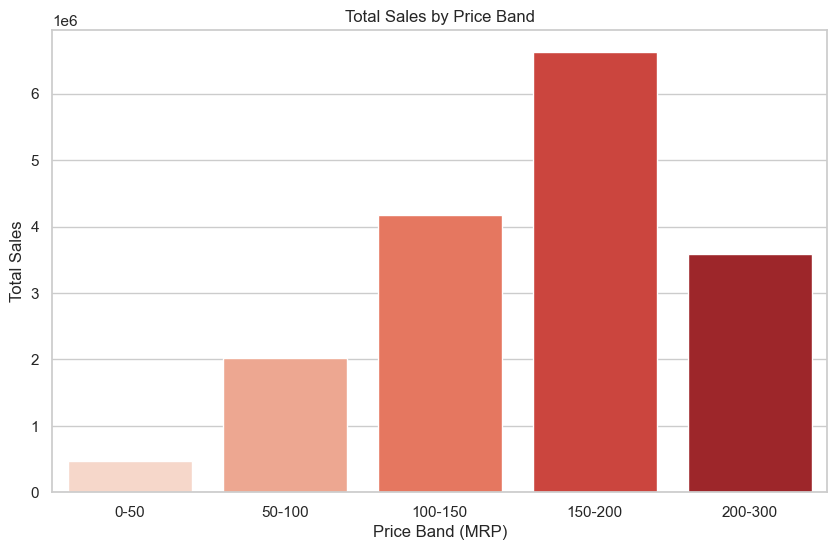

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='bands', y='sum', data=sales_by_band, palette='Reds')
plt.title('Total Sales by Price Band')
plt.xlabel('Price Band (MRP)')
plt.ylabel('Total Sales')
plt.show()

---
## 🔷 Scenario 4: Stock Optimization Strategy

### Problem Statement
Evaluate items with high stock (weight) but low sales.

### 🧠 Instructions:
1. Use `Item_Weight` to simulate stock volume
2. Plot weight vs. sales as scatter

### ✍️ Your Task:

In [ ]:
# TODO: Identify overstocked items with low sales and plot scatter plot

In [105]:
#define threshold
weight_ts=df['Item_Weight'].quantile(0.75)   #high weight so use 75%
sales_ts=df['Item_Outlet_Sales'].quantile(0.25)    #low sales use 25%
overstock=df[(df['Item_Weight']>weight_ts) & (df['Item_Outlet_Sales'] < sales_thresh)]    

In [62]:
summary=overstock.groupby('Item_Type').agg({
    'Item_Weight':'mean',
    'Item_Outlet_Sales':'mean',
    'Item_Identifier':'count'}).reset_index().rename(columns={'Item_Identifier':'count'})

In [65]:
print(summary)

                Item_Type  Item_Weight  Item_Outlet_Sales  count
0            Baking Goods    19.186207         423.632469     29
1                  Breads    18.492857         457.499714      7
2               Breakfast    18.505556         502.013200      9
3                  Canned    18.953571         506.959143     14
4                   Dairy    19.090541         417.294649     37
5            Frozen Foods    18.739024         469.177893     41
6   Fruits and Vegetables    19.156667         411.242467     60
7             Hard Drinks    19.025000         566.595800      2
8      Health and Hygiene    19.038636         519.626636     22
9               Household    19.549020         444.193039     51
10                   Meat    19.147619         517.548533     21
11                 Others    19.033333         391.120511      9
12                Seafood    17.750000         571.256400      4
13            Snack Foods    18.878378         463.684714     37
14            Soft Drinks

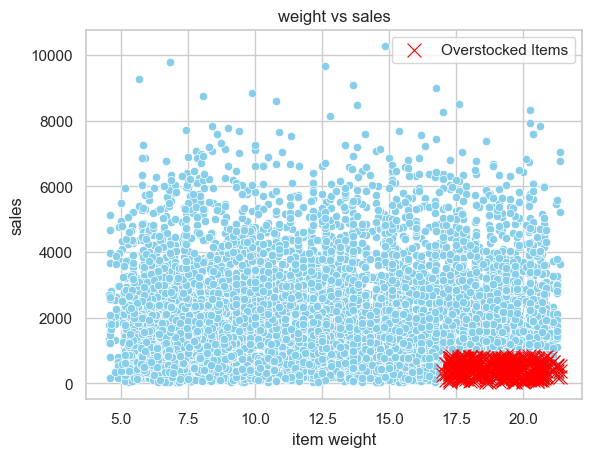

In [67]:
#scatter plot
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=df,color='skyblue')
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=overstock, color='red', label='Overstocked Items', marker='x', s=100)
plt.title('weight vs sales')
plt.xlabel('item weight')
plt.ylabel('sales')
plt.legend()
plt.show()

---
## 🔷 Scenario 5: Correlation with Revenue

### Problem Statement
Find features highly correlated with sales.

### 🧠 Instructions:
1. Use `df.corr()`
2. Visualize heatmap
3. List top 3 positive correlations

### ✍️ Your Task:

In [ ]:
# TODO: Write code to calculate and visualize correlations with sales

In [107]:
# use corr()
numeric_col=df.select_dtypes(include=[np.number]).columns
cor_mat=df[numeric_col].corr()    #create correlation matrix for numeric columns

In [71]:
print(cor_mat)

                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014048  0.027141   
Item_Visibility              -0.014048         1.000000 -0.001315   
Item_MRP                      0.027141        -0.001315  1.000000   
Outlet_Establishment_Year    -0.011588        -0.074834  0.005020   
Item_Outlet_Sales             0.014123        -0.128625  0.567574   
month                         0.012342         0.004173 -0.008757   

                           Outlet_Establishment_Year  Item_Outlet_Sales  \
Item_Weight                                -0.011588           0.014123   
Item_Visibility                            -0.074834          -0.128625   
Item_MRP                                    0.005020           0.567574   
Outlet_Establishment_Year                   1.000000          -0.049135   
Item_Outlet_Sales                          -0.049135           1.000000   
month                                      -0.017096           0.0

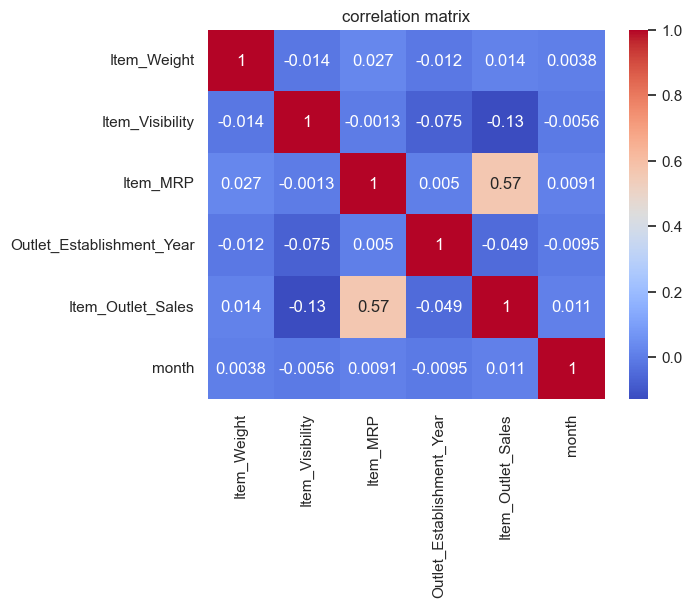

In [109]:
#heatmap
sns.heatmap(cor_mat,annot=True,cmap='coolwarm')   # correlation matrix shows how strong the relationship is
plt.title('correlation matrix')
plt.show()

In [111]:
correlations=cor_mat['Item_Outlet_Sales'].drop('Item_Outlet_Sales').sort_values(ascending=False)
top_3=correlations.head(3) #top 3 strong relationship variables/columns
print(top_3)

Item_MRP       0.567574
Item_Weight    0.014123
month          0.010943
Name: Item_Outlet_Sales, dtype: float64


---
## 📌 Final Instructions:
- Complete all 5 scenarios
- Add comments explaining your steps
- Each scenario should include at least 1 chart
- Submit `.ipynb` with your analysis summary at the end

# Recommendations

 ### 
Promote top-performing Item_Type categories (Scenario 1).
Reduce inventory for overstocked items (Scenario 4) and discount underperformers (Scenario 1).
Optimize pricing in mid-range bands (Scenario 3).
Leverage seasonal trends for promotions (Scenario 2).
Focus on Item_MRP and Item_Weight for sales forecasting (Scenario 5).